In [36]:
import pandas as pd
resourceDf = pd.read_json("../data/resource.json") 
applicationDf = pd.read_json("../data/application.json")
paDf = pd.read_json("../data/productApplication.json")
serverDf = pd.read_json("../data/server.json")

In [37]:
total_resource_count = resourceDf.shape[0]
total_server_count =serverDf.shape[0]

serverResourceDf = resourceDf[
    resourceDf["type"].isin(['server','legacy-server','legacy-physical-server'])]
serverResourceDf.shape

(134009, 10)

In [38]:
import json
defaultPA = json.loads(paDf[paDf["name"]=='default'].to_json())
default_pa_id = defaultPA['_id']['0']['$oid']
print(default_pa_id)

61d3cd987d7ab1f2dc6bab0d


In [39]:
pd.set_option('mode.chained_assignment',  None) 

applicationDf["parentGroup"] = applicationDf["parentGroup"].apply(lambda x : x['_id']['$oid'])
applicationDf["_id"] = applicationDf["_id"].apply(lambda x : x['$oid'])
serverResourceDf["parentGroups"]= serverResourceDf["parentGroups"].apply(lambda x : x[0]['_id']['$oid'])

In [40]:
lookupServerApplicationDf = pd.merge(left = serverResourceDf , right = applicationDf, left_on='parentGroups', right_on='_id', how = "left" ,suffixes=["_resource","_application"])

In [41]:
non_default_pa_server = lookupServerApplicationDf[lookupServerApplicationDf["parentGroup"] != default_pa_id]
non_default_pa_server.dropna(axis=0,how='any',subset=["parentGroup","parentGroups"],inplace = True)
non_default_pa_server_count= non_default_pa_server.shape[0]
print(non_default_pa_server_count)

75323


([<matplotlib.patches.Wedge at 0x44584b5b0>,
 [Text(-0.6967362551371665, 0.8512100744102113, 'server'),
  Text(-0.17821475199406925, -1.0854674118423329, 'legacy_server'),
  Text(0.7270836827949165, -0.8254388640071302, 'legacy_physical_server')],
 [Text(-0.3800379573475453, 0.46429640422375157, '71.834%'),
  Text(-0.09720804654221958, -0.5920731337321815, '1.152%'),
  Text(0.39659109970631806, -0.4502393803675255, '27.014%')])

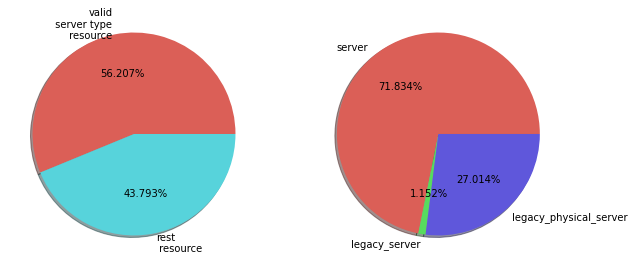

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

rest_server_count=total_resource_count-non_default_pa_server_count
values = [non_default_pa_server_count, rest_server_count]
labels = ["valid\n server type\n resource", "rest\n resource"]
colors = sns.color_palette('hls',len(labels))
plt.subplot(1,2,1)
plt.pie(values,labels=labels, autopct='%.3f%%', colors = colors, shadow=True)

server_count = resourceDf[resourceDf["type"]=="server"].shape[0]
legacy_server_count= resourceDf[resourceDf["type"]=="legacy-server"].shape[0]
legacy_physical_server_count=resourceDf[resourceDf["type"]=="legacy-physical-server"].shape[0]
values2 = [server_count,legacy_server_count,legacy_physical_server_count ]
labels2 = ["server", "legacy_server", "legacy_physical_server"]
colors2 = sns.color_palette('hls',len(labels2))
plt.subplot(1,2,2)
plt.pie(values2,labels=labels2, autopct='%.3f%%', colors = colors2, shadow=True)

([<matplotlib.patches.Wedge at 0x516cd9370>,
 [Text(0.31587938347034805, 1.0536698795630408, 'valid\n server type\n resource'),
  Text(-0.31587938347034866, -1.0536698795630406, 'rest server')],
 [Text(0.17229784552928074, 0.5747290252162041, '40.729%'),
  Text(-0.17229784552928107, -0.574729025216204, '59.271%')])

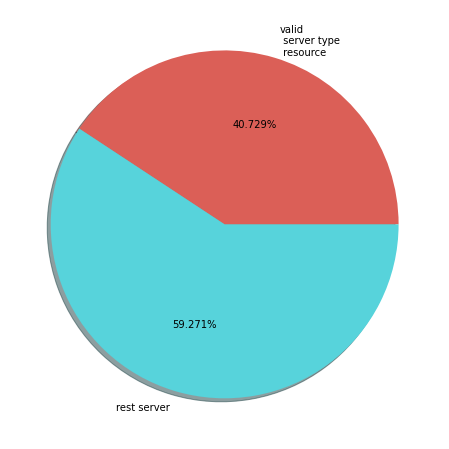

In [43]:
plt.figure(figsize=(10,8))

values3 = [non_default_pa_server_count, total_server_count-non_default_pa_server_count]
labels3 = ["valid\n server type\n resource", "rest server"]
colors3 = sns.color_palette('hls',len(labels))
plt.pie(values3,labels=labels3, autopct='%.3f%%', colors = colors3, shadow=True)